<a href="https://colab.research.google.com/github/Muhammad0Awais/AMLLabs/blob/main/FinalTermLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Final Exam Lab
```
- Advanced Machine Learning, Innopolis University 
- Professor: Muhammad Fahim 
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

```
Tasks:
  1. Data Preprocessing (5 points)
  2. Conditional Generative adversarial network definition (5 points)
  3. Conditional Generative adversarial network training (10 points)
  4. Text explainer implemetation using Lime or Shap (5 bonus points)
```

<hr>

## The Dataset

For this task the 20 newsgroups text dataset is used. [LINK](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)

In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

import nltk, string, re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Available device : {device}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Available device : cuda


## Task 1: Preprocessing of Dataset (5 points)



1.  Loading and cleaning of Text data:
    * Choose 4 categories from the dataset  
    * Implement a method `clean_text` which will take text then make text lowercase, remove punctuation, whitespaces and stopwords
    * Plot the distribution of classes/categories

In [2]:
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball','rec.sport.hockey'] #TODO: Choose 4 categories from the dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_valid = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [3]:
def clean_text(text):
    """ Function to perform common NLP pre-processing tasks. """
    # make lowercase

    text = text.lower()


    # remove punctuation

    words = nltk.word_tokenize(text)

    words=[word.lower() for word in words if word.isalpha()]

    # remove numbers

    # remove whitespaces

    # remove stopwords
    stop_words = set(stopwords.words('english')) 
  
    filtered_sentence = [w for w in words if not w in stop_words] 

    # remove short words

    filtered_sentence_4 = [w for w in words if len(w)>=4]

    textt = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered_sentence_4]).strip()

    return textt

In [4]:
# print(clean_text("   Hello I a'm nbasdf BN asdf 1 2 2 2 asdfjkasd "))

In [5]:
train_sentences = []
validation_sentences = []

train_labels = []
validation_labels = []


# Clean training sentences
for id in range(len(newsgroups_train.data)):
    text = clean_text(newsgroups_train.data[id])
    label = newsgroups_train.target[id]
    if text:
        train_sentences.append(text)
        train_labels.append(label)

# Clean validation sentences
for id in range(len(newsgroups_valid.data)):
    text = clean_text(newsgroups_valid.data[id])
    label = newsgroups_valid.target[id]
    if text:
        validation_sentences.append(text)
        validation_labels.append(label)

In [6]:
categorie_s = ['autos', 'motorcycles', 'baseball','hockey']
trainlabels = [categorie_s[i] for i in train_labels]

validationlabels  = [categorie_s[i] for i in validation_labels]

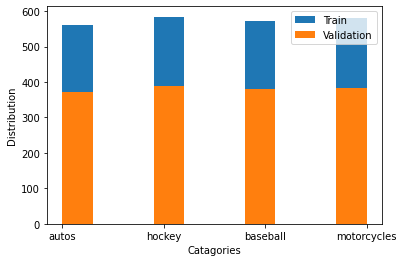

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(trainlabels)  # density=False would make counts
plt.hist(validationlabels)  # density=False would make counts
plt.legend(["Train", "Validation"])
plt.ylabel('Distribution')
plt.xlabel('Catagories');


## Create vocabulary

In [8]:
# Create tokenizer
en_tokenizer = get_tokenizer('spacy', language='en')

# Create vocabulary
def build_vocab(sentences, tokenizer):
    counter = Counter()
    for sentence in sentences:
        counter.update(tokenizer(sentence))
    return Vocab(counter, specials=['<unk>', '<pad>'])

vocabulary = build_vocab(train_sentences, en_tokenizer)

## Add padding 

In [9]:
max_len = 128

# Add Padding 
def create_dataset(sentences, labels, en_tokenizer, vocab, max_len=128):
    res = []
    for sentence in sentences:
        sentence_tokens = [vocab[token] for token in en_tokenizer(sentence)]
        if len(sentence_tokens) <= max_len:
            sentence_tokens = sentence_tokens + [vocab['<pad>']]*(max_len-len(sentence_tokens))
        else:
            sentence_tokens = sentence_tokens[:max_len]
        sentence_tensor = torch.tensor(sentence_tokens,dtype=torch.long)
        res.append(sentence_tensor)
        
    return TensorDataset(torch.stack(res),torch.from_numpy(np.array(labels)))

BATCH_SIZE = 128
PAD_IDX = vocabulary['<pad>']

train_dataset = create_dataset(train_sentences,train_labels, en_tokenizer, vocabulary)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset = create_dataset(validation_sentences, validation_labels, en_tokenizer, vocabulary)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

import nltk, string, re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Available device : {device}")

pathtrain_loader = '/content/drive/MyDrive/ML Labs/final/train_loader.pt'
pathtrain_dataset = '/content/drive/MyDrive/ML Labs/final/train_dataset.pt'
pathvalidation_dataset = '/content/drive/MyDrive/ML Labs/final/validation_dataset.pt'
pathvocabulary = '/content/drive/MyDrive/ML Labs/final/vocabulary.pt'

BATCH_SIZE = 128
max_len = 128

# torch.save(train_loader, pathtrain_loader)
# torch.save(train_dataset, pathtrain_dataset)
# torch.save(validation_dataset,pathvalidation_dataset)
# torch.save(vocabulary, pathvocabulary)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Available device : cuda


In [2]:
train_loader = torch.load(pathtrain_loader)
train_dataset = torch.load(pathtrain_dataset)
validation_dataset = torch.load(pathvalidation_dataset)
vocabulary = torch.load(pathvocabulary)

## Task 2: Conditional Generative adversarial network definition (5 points)

1.  Models Definition:
    * Define the Generator & Discriminator network (Achitecture of your choice) 

In [31]:
# TODO: Implement the Generator & Discriminator class
class Generator(nn.Module):
    # initializers
    def __init__(self,output_dim, noise_dim=32):
        super(Generator, self).__init__()
        embedingy = 128
        self.label_emb = nn.Embedding(4, embedingy)
        self.output_dim = output_dim
        
        self.model = nn.Sequential(
            nn.Linear(embedingy+noise_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, output_dim)
        )

    # forward method. Condition is should be incorporated to the model input 
    def forward(self, x, labels):
        z = x.view(x.size(0), 100)
        c = self.label_emb(labels)
        print("x dimension", x.shape)
        print("c dimension", c.shape)
        x = torch.cat([z, c])
        out = self.model(x)
        return out.view(x.size(0), self.output_dim)

class Discriminator(nn.Module):
    # initializers
    def __init__(self,input_size):
        super(Discriminator, self).__init__()
        embedingy = 128
        self.label_emb = nn.Embedding(4, embedingy)
        self.input_size = input_size

        self.model = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    # forward method. Note: Condition is should be incorporated to the model input
    def forward(self, x, labels):
        x = x.view(x.size(0), self.input_size)
        c = self.label_emb(labels)
        print("x dimension", x.shape)
        print("c dimension", c.shape)
        x = torch.cat([x, c])
        out = self.model(x)
        return out.squeeze()

# define discriminator and generator
# TODO: specify the input and output size

D = Discriminator(input_size=max_len).to(device).float()
G = Generator(output_dim=max_len).to(device).float()

print(G)
print()
print(D)

Generator(
  (label_emb): Embedding(4, 128)
  (model): Sequential(
    (0): Linear(in_features=160, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=1024, out_features=128, bias=True)
  )
)

Discriminator(
  (label_emb): Embedding(4, 128)
  (model): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Dropout(p=0.

## Task 3: Conditional Generative adversarial network training (10 points)

* Implement the Conditional Generative adversarial network training procedure 
* Define the optimizers for Generator and Discriminator network
* Define the loss functions
* Add Tensorboard to log the Generator and Discriminator loss (for both Training and Validation). For discriminator the loss on fake samples and real samples should be logged separately 

**NOTE:** It is not important that the loss decreases during the training loop for this task. It is important that the training procedure is correctly implemented

In [4]:
from torch.utils.tensorboard import SummaryWriter

%load_ext tensorboard

writer = SummaryWriter()

# params
learning_rate = 0.0001
n_epochs = 10

# TODO: Create optimizers for the discriminator and generator
# d_optimizer = None
# g_optimizer = None

criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=1e-4)
g_optimizer = torch.optim.Adam(G.parameters(), lr=1e-4)

#fixed noise for validation 
fixed_noise = torch.normal(0,1, (len(validation_dataset),max_len), dtype=torch.float, device=device)

In [5]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
    g_optimizer.zero_grad()
    z = Variable(torch.randn(max_len, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, max_len, batch_size))).cuda()
    fake_images = generator(z, fake_labels)
    validity = discriminator(fake_images, fake_labels)
    g_loss = criterion(validity, Variable(torch.ones(max_len)).cuda())
    g_loss.backward()
    g_optimizer.step()
    return g_loss.data[0]

In [24]:
def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
    d_optimizer.zero_grad()

    # train with real images
    real_validity = discriminator(real_images, labels)
    print(real_validity.shape)
    real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).cuda())
    
    # train with fake images
    # z = 
    z = Variable(torch.randn(max_len, 100)).cuda()
    fake_labels = Variable(torch.LongTensor(np.random.randint(0, max_len, batch_size))).cuda()
    fake_images = generator(z, fake_labels)
    fake_validity = discriminator(fake_images, fake_labels)
    fake_loss = criterion(fake_validity, Variable(torch.zeros(max_len)).cuda())
    
    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss.data[0]

In [10]:
def real_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.ones(batch_size).to(device) # real labels = 1     
    
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.FloatTensor(batch_size).uniform_(0, 0.1).to(device) # fake labels approx 0
    labels = labels.to(device)
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [32]:
## TODO: Implement the training procedure and log train & validation loss using tensorboard
# batch_size = 128
for epoch in range(n_epochs):
    print("loss")
    for x,y in train_loader:
        x = x.to(device)
        y = y.to(device)

        #Train discriminator

        #Train generator

        #validation 

        #Log Train and validation loss for G and D (training loss for fake and real separate) : Use tensorboard
        real_texts = Variable(x).cuda()
        labels = Variable(y).cuda()
        G.train()
        batch_size = real_texts.size(0)
        d_loss = discriminator_train_step(len(real_texts), D,
                                          G, d_optimizer, criterion,
                                          real_texts, labels)
        

        g_loss = generator_train_step(batch_size, D, G, g_optimizer, criterion)
        print("loss")

    generator.eval()
    print('g_loss: {}, d_loss: {}'.format(g_loss, d_loss))
    z = Variable(torch.randn(9, 100)).cuda()
    labels = Variable(torch.LongTensor(np.arange(9))).cuda()
    sample_images = generator(z, labels).unsqueeze(1).data.cpu()
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()


loss
x dimension torch.Size([128, 128])
c dimension torch.Size([128, 128])
torch.Size([256])


ValueError: ignored

In [16]:
## TODO: Implement the training procedure and log train & validation loss using tensorboard

for epoch in range(n_epochs):
    for x,y in train_loader:
        x = x.to(device)
        y = y.to(device)
        
        #Train discriminator
        d_optimizer.zero_grad()
        D_real = D(x, y)
        d_real_loss = real_loss(D_real)

        x_fake = torch.FloatTensor(y.shape[0],32).uniform_(0, 1000).to(device)
        x_fake = G(x_fake, y)
        D_fake = D(x_fake, y)
        d_fake_loss = fake_loss(D_fake)
        
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()
        
        #Train generator
        g_optimizer.zero_grad()
        z = torch.FloatTensor(y.shape[0],32).uniform_(0, 1000).to(device)
        fake_x = G(z, y)
        fake_losses = real_loss(D(fake_x, y))
        fake_losses.backward()
        g_optimizer.step()
        #validation 
        # for x_val, y_val in val_loader:
            
        # #Log Train and validation loss for G and D (training loss for fake and real separate) : Use tensorboard
        # writer.add_scalar("Train/generator", fake_losses, epoch)
        # writer.add_scalar("Train/discriminator", d_loss, epoch)

x dimension torch.Size([128, 128])
c dimension torch.Size([128, 128])


RuntimeError: ignored

## Launch Tensorboard

In [ ]:
%tensorboard --logdir ./runs

## Task 4: (Optional): Text explainer implemetation using Lime or Shap (5 bonus points)

Using the [20 newsgroups](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) text dataset is used.
Create a simple(i.e Decision tree, Random Forest) multi-class classifier and explain the classifiers predictions with the help of LIME or SHARP. 

**Note:** Use TF-IDF for feature extraction

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

clf = None

## <center>Solution should be pushed to github and link to github submitted to Moodle</center>